#Problem Statement

Task 1:-Prepare a complete data analysis report on the given data.

Task 2:-Create a predictive model which helps  to predict seven different cover types in four different wilderness areas of the Forest with the best accuracy..

# importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# connecting google drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# reading dataset

In [3]:
df=pd.read_csv('/content/drive/MyDrive/forest cover/train.csv')


In [4]:
df.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


In [5]:
df.tail()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
15115,15116,2607,243,23,258,7,660,170,251,214,...,0,0,0,0,0,0,0,0,0,3
15116,15117,2603,121,19,633,195,618,249,221,91,...,0,0,0,0,0,0,0,0,0,3
15117,15118,2492,134,25,365,117,335,250,220,83,...,0,0,0,0,0,0,0,0,0,3
15118,15119,2487,167,28,218,101,242,229,237,119,...,0,0,0,0,0,0,0,0,0,3
15119,15120,2475,197,34,319,78,270,189,244,164,...,0,0,0,0,0,0,0,0,0,3


# Basic checks

In [6]:
df.columns

Index(['Id', 'Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_

In [7]:
df['Cover_Type'].value_counts()

,count
Cover_Type,
5,2160
2,2160
1,2160
7,2160
3,2160
6,2160
4,2160


In [8]:
df['Wilderness_Area1'].value_counts()

,count
Wilderness_Area1,
0,11523
1,3597


In [9]:
df['Wilderness_Area2'].value_counts()

,count
Wilderness_Area2,
0,14621
1,499


In [10]:
df['Wilderness_Area3'].value_counts()

,count
Wilderness_Area3,
0,8771
1,6349


In [11]:
df['Wilderness_Area4'].value_counts()

,count
Wilderness_Area4,
0,10445
1,4675


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 56 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Id                                  15120 non-null  int64
 1   Elevation                           15120 non-null  int64
 2   Aspect                              15120 non-null  int64
 3   Slope                               15120 non-null  int64
 4   Horizontal_Distance_To_Hydrology    15120 non-null  int64
 5   Vertical_Distance_To_Hydrology      15120 non-null  int64
 6   Horizontal_Distance_To_Roadways     15120 non-null  int64
 7   Hillshade_9am                       15120 non-null  int64
 8   Hillshade_Noon                      15120 non-null  int64
 9   Hillshade_3pm                       15120 non-null  int64
 10  Horizontal_Distance_To_Fire_Points  15120 non-null  int64
 11  Wilderness_Area1                    15120 non-null  int64
 12  Wild

In [13]:
print(df.shape)

(15120, 56)


In [14]:
print('information of null values',df.isnull().sum())

information of null values Id                                    0
Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10  

In [15]:
print(df.duplicated().sum())

0


In [16]:
print(df.nunique())

Id                                    15120
Elevation                              1665
Aspect                                  361
Slope                                    52
Horizontal_Distance_To_Hydrology        400
Vertical_Distance_To_Hydrology          423
Horizontal_Distance_To_Roadways        3250
Hillshade_9am                           176
Hillshade_Noon                          141
Hillshade_3pm                           247
Horizontal_Distance_To_Fire_Points     2710
Wilderness_Area1                          2
Wilderness_Area2                          2
Wilderness_Area3                          2
Wilderness_Area4                          2
Soil_Type1                                2
Soil_Type2                                2
Soil_Type3                                2
Soil_Type4                                2
Soil_Type5                                2
Soil_Type6                                2
Soil_Type7                                1
Soil_Type8                      

In [17]:
print('number of rows',df.shape[0])

number of rows 15120


In [18]:
print('number of column',df.shape[1])

number of column 56


In [19]:
print('Summary statistics numerical of data')
df.describe()

Summary statistics numerical of data


,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,15120.00000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,...,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,7560.50000,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,...,0.045635,0.040741,0.001455,0.006746,0.000661,0.002249,0.048148,0.043452,0.030357,4.000000
std,4364.91237,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,...,0.208699,0.197696,0.038118,0.081859,0.025710,0.047368,0.214086,0.203880,0.171574,2.000066
min,1.00000,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3780.75000,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,7560.50000,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,11340.25000,3104.000000,261.000000,22.000000,330.000000,79.000000,2270.000000,235.000000,235.000000,167.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
max,15120.00000,3849.000000,360.000000,52.000000,1343.000000,554.000000,6890.000000,254.000000,254.000000,248.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [20]:
df.drop('Id',axis=1,inplace=True)

# EDA

Let's start by visualizing the distribution of the target variable `Cover_Type`.

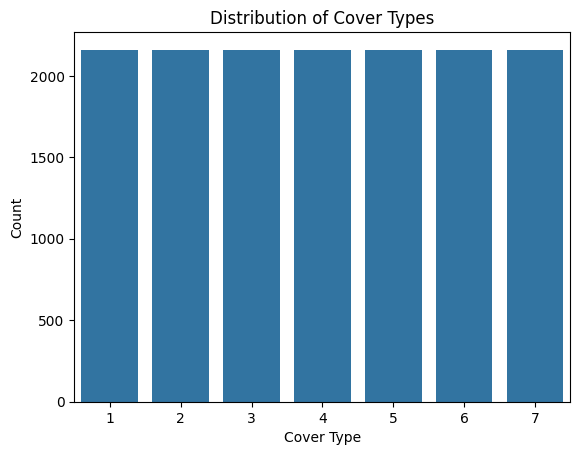

In [21]:
sns.countplot(x='Cover_Type',data=df)
plt.title('Distribution of Cover Types')
plt.xlabel('Cover Type')
plt.ylabel('Count')
plt.show()

> Each class (1 to 7) has almost equal number of samples

>>This means the dataset is balanced

In [22]:
df.head(1)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5


---
# Univariate Analysis



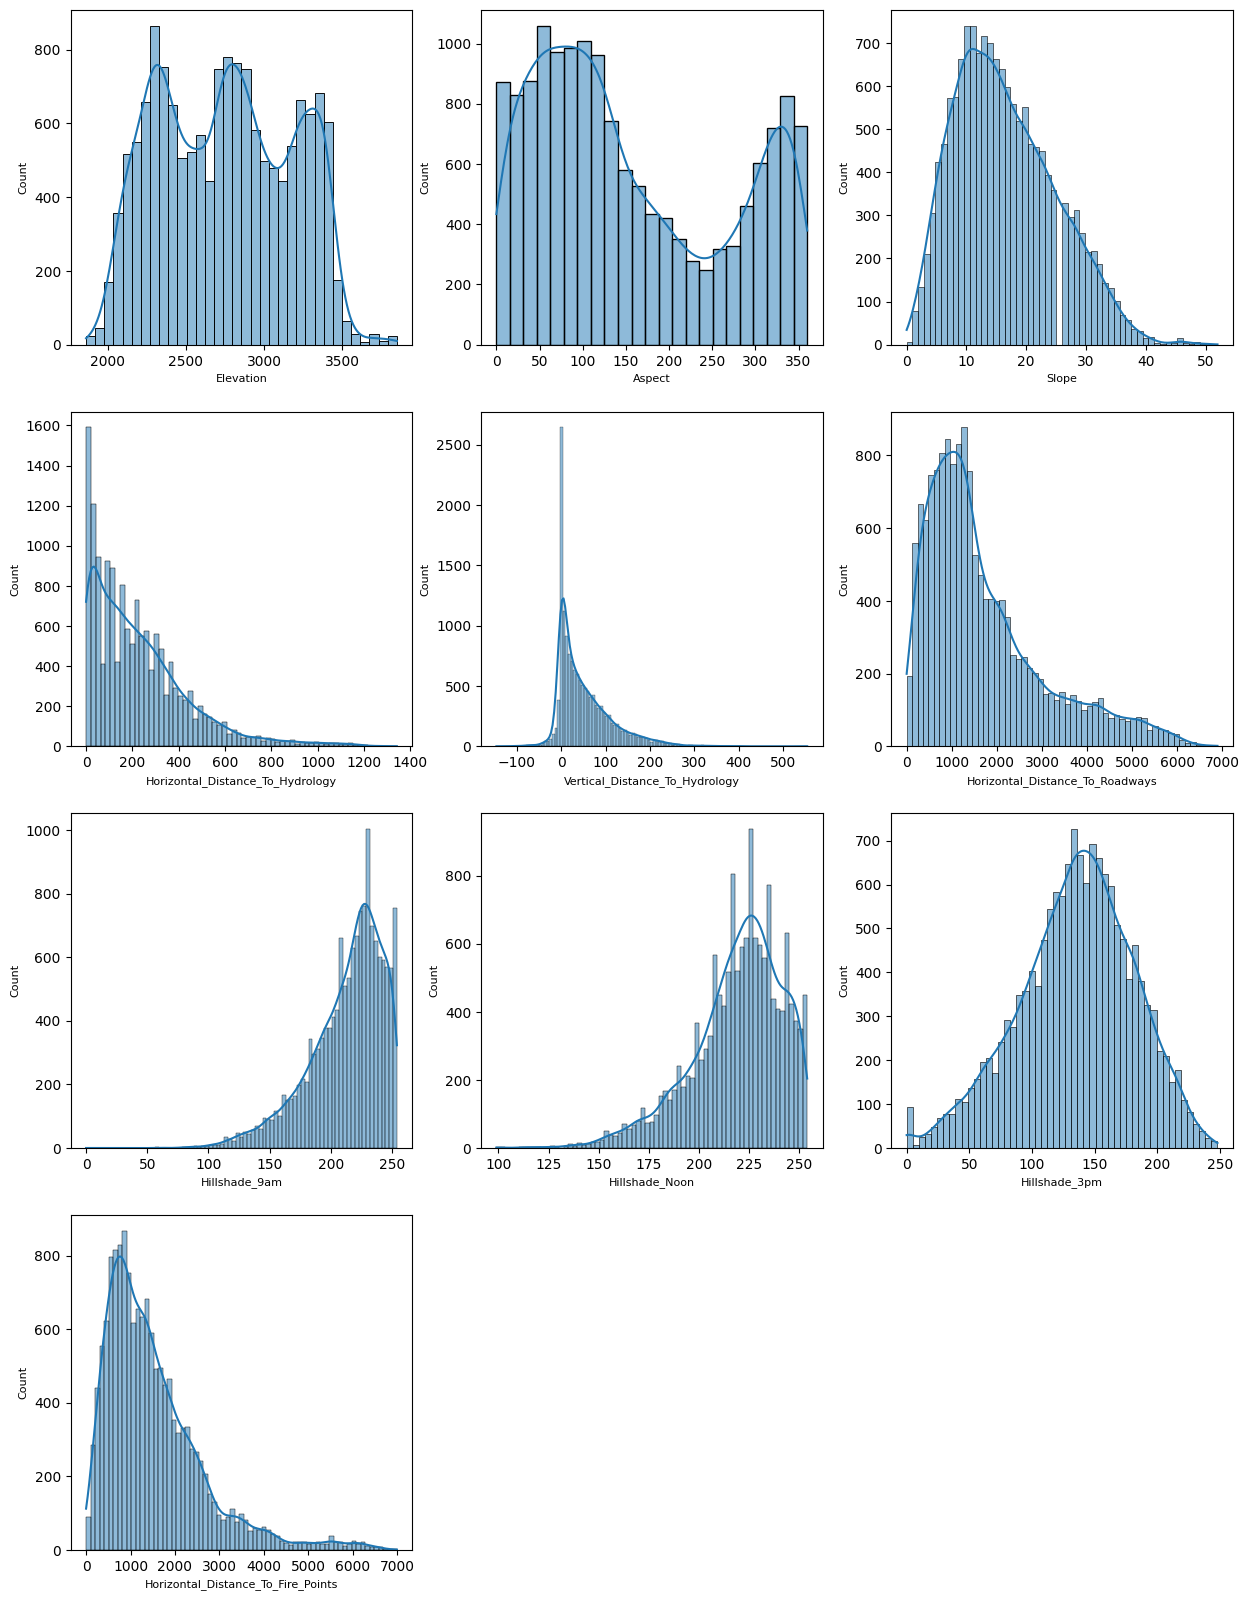

In [23]:
num_cols=['Elevation','Aspect','Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology','Horizontal_Distance_To_Roadways','Hillshade_9am','Hillshade_Noon','Hillshade_3pm','Horizontal_Distance_To_Fire_Points']
pltno=1
plt.figure(figsize=(15, 20)) # Increased figure size

for col in num_cols:
  if pltno<=10:
    ax=plt.subplot(4,3,pltno)
    sns.histplot(df[col],kde=True)
    plt.xlabel(col,fontsize=8)
    plt.ylabel('Count',fontsize=8)
    pltno+=1
plt.show()



*   Outliers : Nearly Every Columns has an outliers we have to perform IQR or Z-Score method to method to remove them.
*   left-Skewness : 'Horizontal_Distance_To_Fire_Points',        'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways' These columns are showing highly left-skewed data

* Right-Skewness: 'Hillshade_9am', 'Hillshade_Noon' these columns are showing highly right-skewed data
* While the "Hillshade_3pm" showing the normal distribution.



---

# Bivariate Analysis(Feature vs Target)

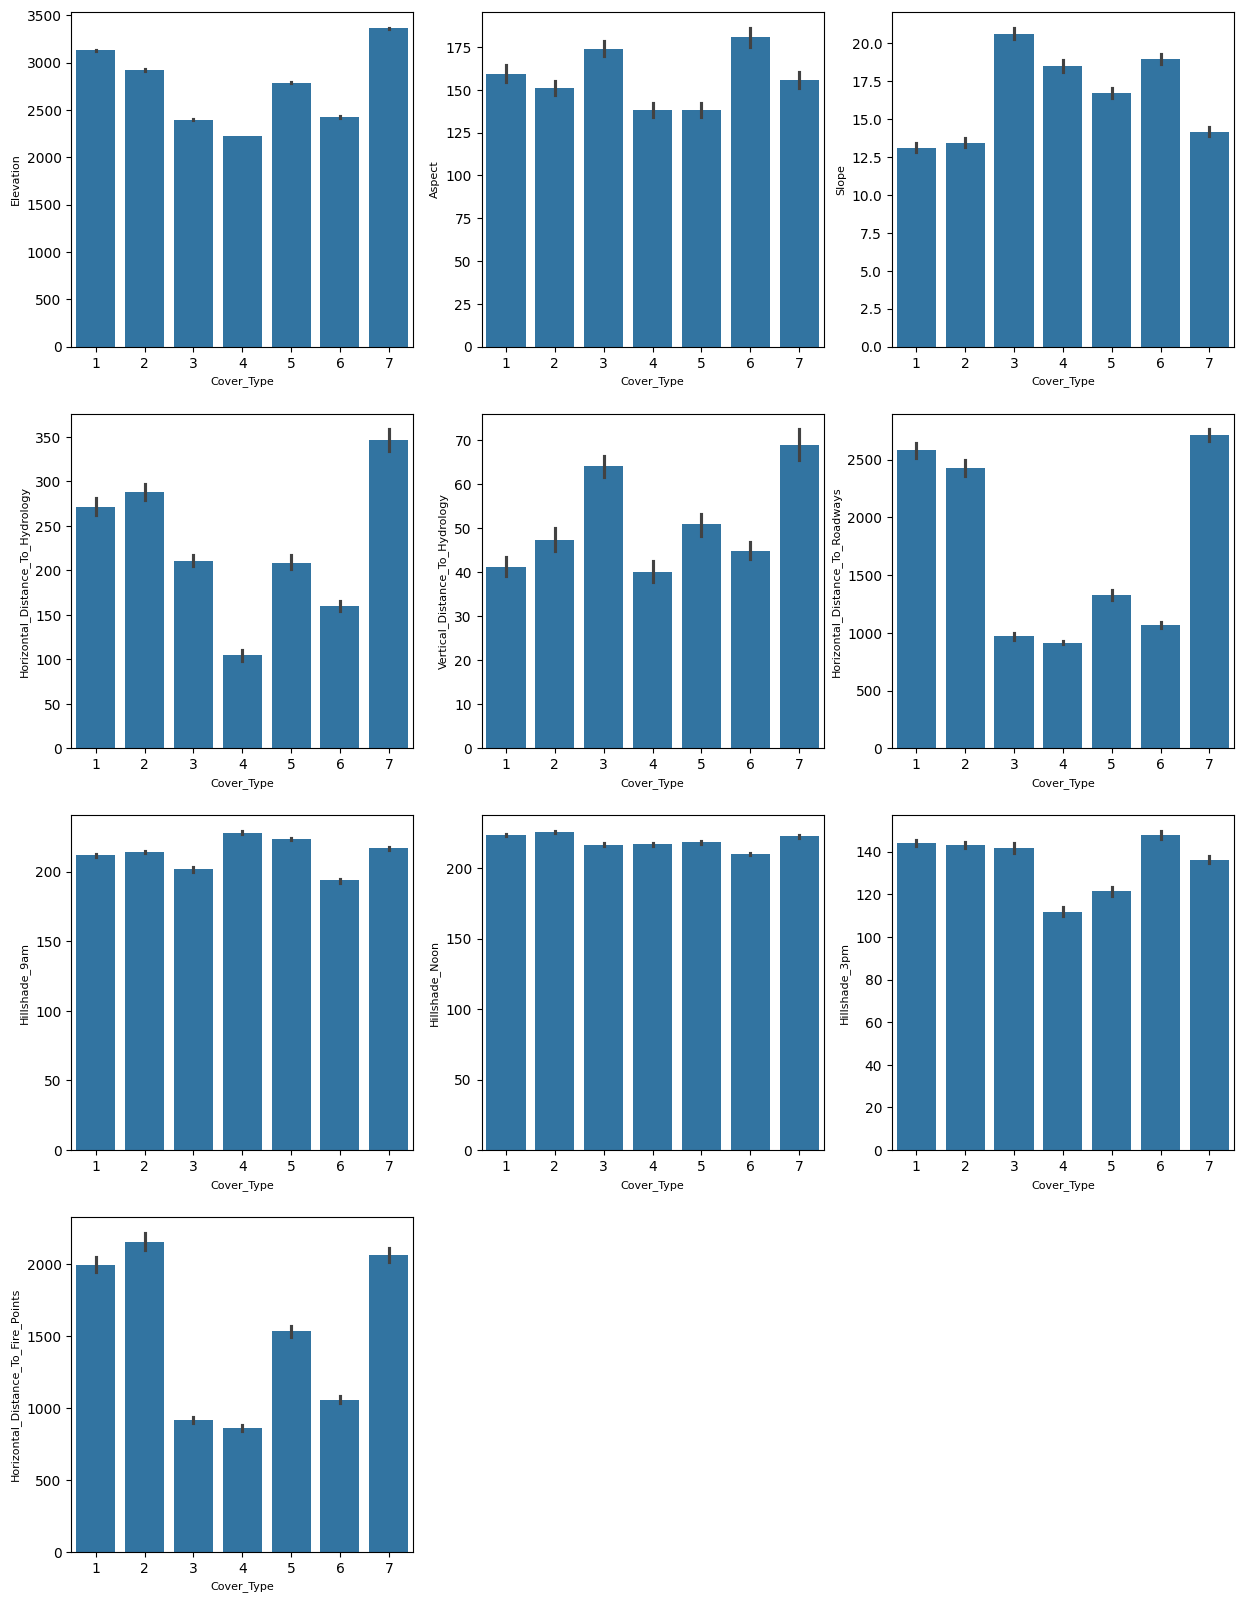

In [24]:
pltno=1
plt.figure(figsize=(15, 20)) # Increased figure size

for col in num_cols:
  if pltno<=10:
    ax=plt.subplot(4,3,pltno)
    sns.barplot(x='Cover_Type',y=col,data=df)
    plt.ylabel(col,fontsize=8)
    plt.xlabel('Cover_Type',fontsize=8)
    pltno+=1
plt.show()


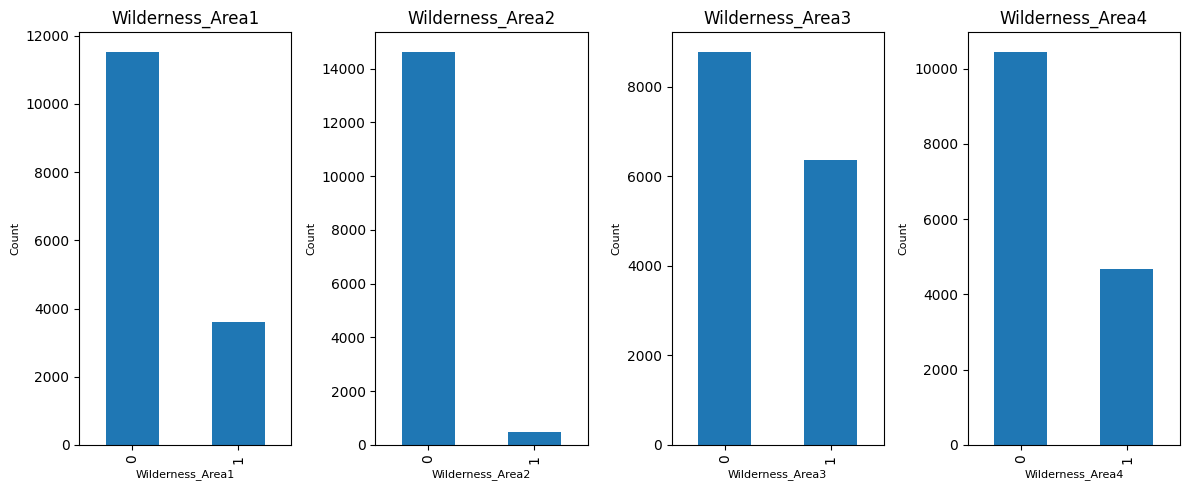

In [25]:
wilderness = [col for col in df.columns if "Wilderness_Area" in col]


# Plotting Wilderness Area distributions
plt.figure(figsize=(12, 5))
pltno = 1
for col in wilderness:
    ax = plt.subplot(1, 4, pltno)
    df[col].value_counts().plot(kind='bar')
    plt.title(col)
    plt.xlabel(col, fontsize=8)
    plt.ylabel('Count', fontsize=8)
    pltno += 1
plt.tight_layout()
plt.show()



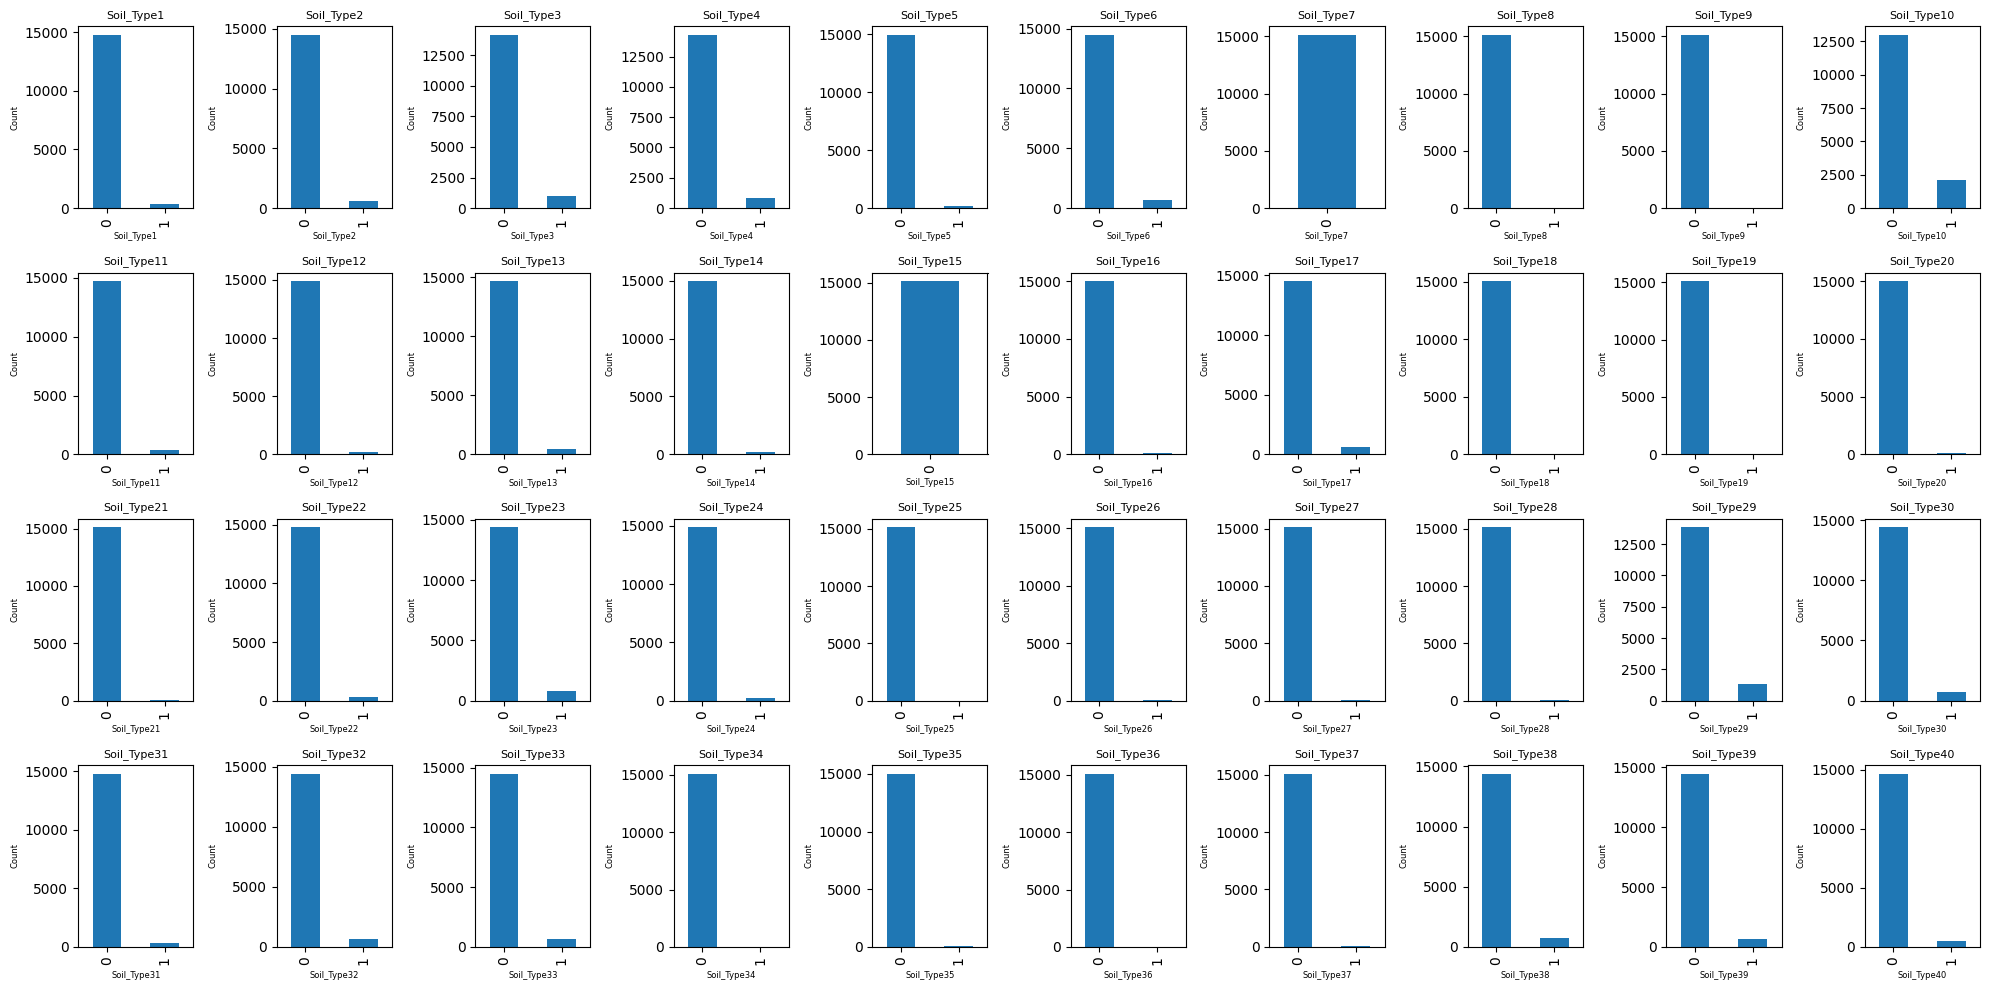

In [26]:
soil = [col for col in df.columns if "Soil_Type" in col]

# Plotting Soil Type distributions
plt.figure(figsize=(20, 10))
pltno = 1
for col in soil:
    ax = plt.subplot(4, 10, pltno) # Adjust subplot grid as needed for the number of soil types
    df[col].value_counts().plot(kind='bar')
    plt.title(col, fontsize=8)
    plt.xlabel(col, fontsize=6)
    plt.ylabel('Count', fontsize=6)
    pltno += 1
plt.tight_layout()
plt.show()

In [27]:
pd.crosstab(df['Cover_Type'], df['Soil_Type10'])


Soil_Type10,0,1
Cover_Type,,
1,2151,9
2,2079,81
3,1443,717
4,1990,170
5,2096,64
6,1059,1101
7,2160,0


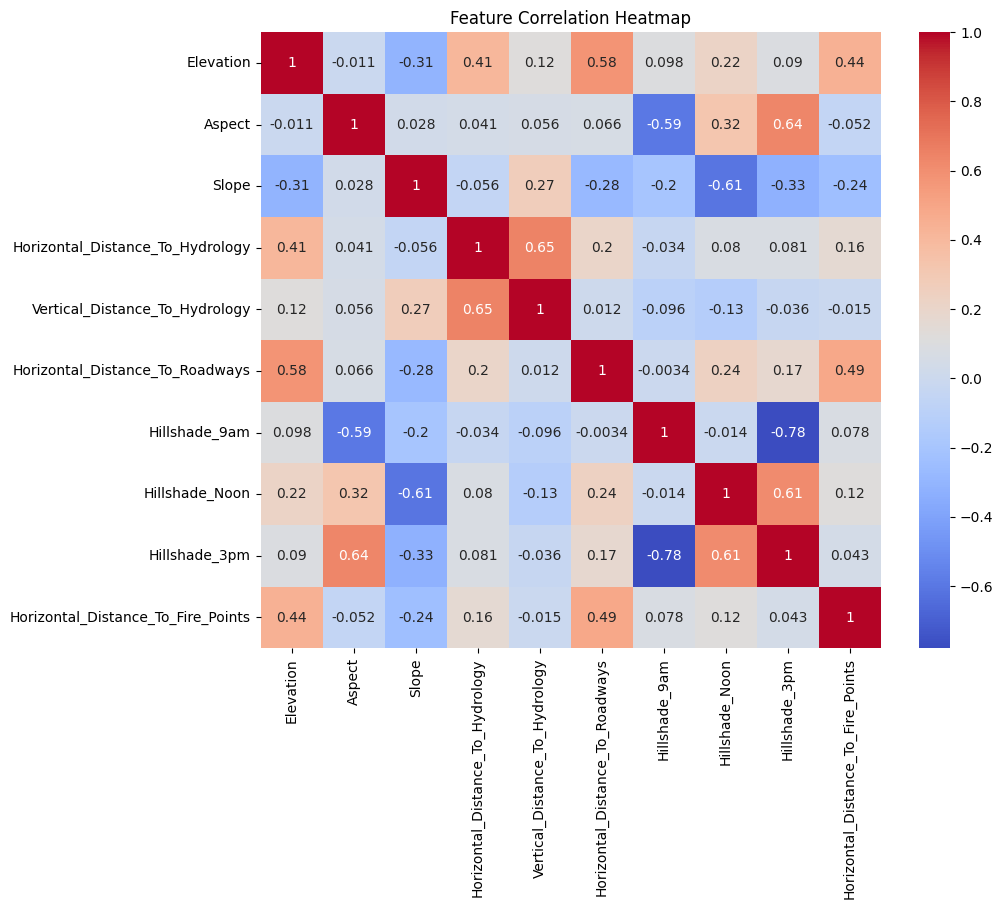

In [28]:
corr = df[num_cols].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


* Strong Negative Correlation: 'Hillshade_9am' and 'Hillshade_3pm' show a strong negative correlation (-0.78), which is expected as they represent opposite times of the day when shading would be different.

* Moderate Negative Correlation: Slope has moderate negative correlations with 'Hillshade_Noon (-0.61)' and 'Hillshade_3pm (-0.33)', and a weaker negative correlation with 'Hillshade_9am (-0.20)'. This suggests that as the slope increases, the amount of direct sunlight received at noon and 3 pm decreases.

* Moderate Positive Correlation: 'Horizontal_Distance_To_Hydrology' and 'Vertical_Distance_To_Hydrology' have a moderate 'positive correlation (0.65)', indicating that areas closer horizontally to water sources also tend to be closer vertically.

* Other Correlations: There are other weaker correlations between features like Elevation with distance to roads and fire points, and 'Horizontal_Distance_To_Roadways' with 'Horizontal_Distance_To_Fire_Points'.



---
# Feature Engineering
## a) Combine correlated features


In [29]:
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [30]:
df['Mean_Hillshade'] = (df['Hillshade_9am'] + df['Hillshade_Noon'] + df['Hillshade_3pm']) / 3
df = df.drop(columns=['Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm'])


In [31]:
df.head(2)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,...,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type,Mean_Hillshade
0,2596,51,3,258,0,510,6279,1,0,0,...,0,0,0,0,0,0,0,0,5,200.333333
1,2590,56,2,212,-6,390,6225,1,0,0,...,0,0,0,0,0,0,0,0,5,202.000000


## b) Create Interaction Features

In [32]:
df['Elevation_Hydro_Road'] = df['Elevation'] - (df['Horizontal_Distance_To_Hydrology'] * 0.5 + df['Horizontal_Distance_To_Roadways'] * 0.5)
df['Hydrology_Road'] = df['Horizontal_Distance_To_Hydrology'] + df['Horizontal_Distance_To_Roadways']
df['Hydrology_Fire'] = df['Horizontal_Distance_To_Hydrology'] + df['Horizontal_Distance_To_Fire_Points']


## c)Handle scaling (standardization)

In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
cont_cols = ['Elevation', 'Aspect', 'Slope',
             'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
             'Horizontal_Distance_To_Roadways', 'Horizontal_Distance_To_Fire_Points',
             'Mean_Hillshade', 'Elevation_Hydro_Road', 'Hydrology_Road', 'Hydrology_Fire']

df[cont_cols] = scaler.fit_transform(df[cont_cols])


## d) Encode Binary & Categorical Features

In [34]:
binary_cols = [col for col in df.columns if 'Wilderness_Area'in col or 'Soil_Type'in col]

## e) Final Feature Check

In [35]:
print("Final Feature check:",df.shape[1])
print("Target Variable:",'Cover_Type')

Final Feature check: 56
Target Variable: Cover_Type




---
# Outliers Handling



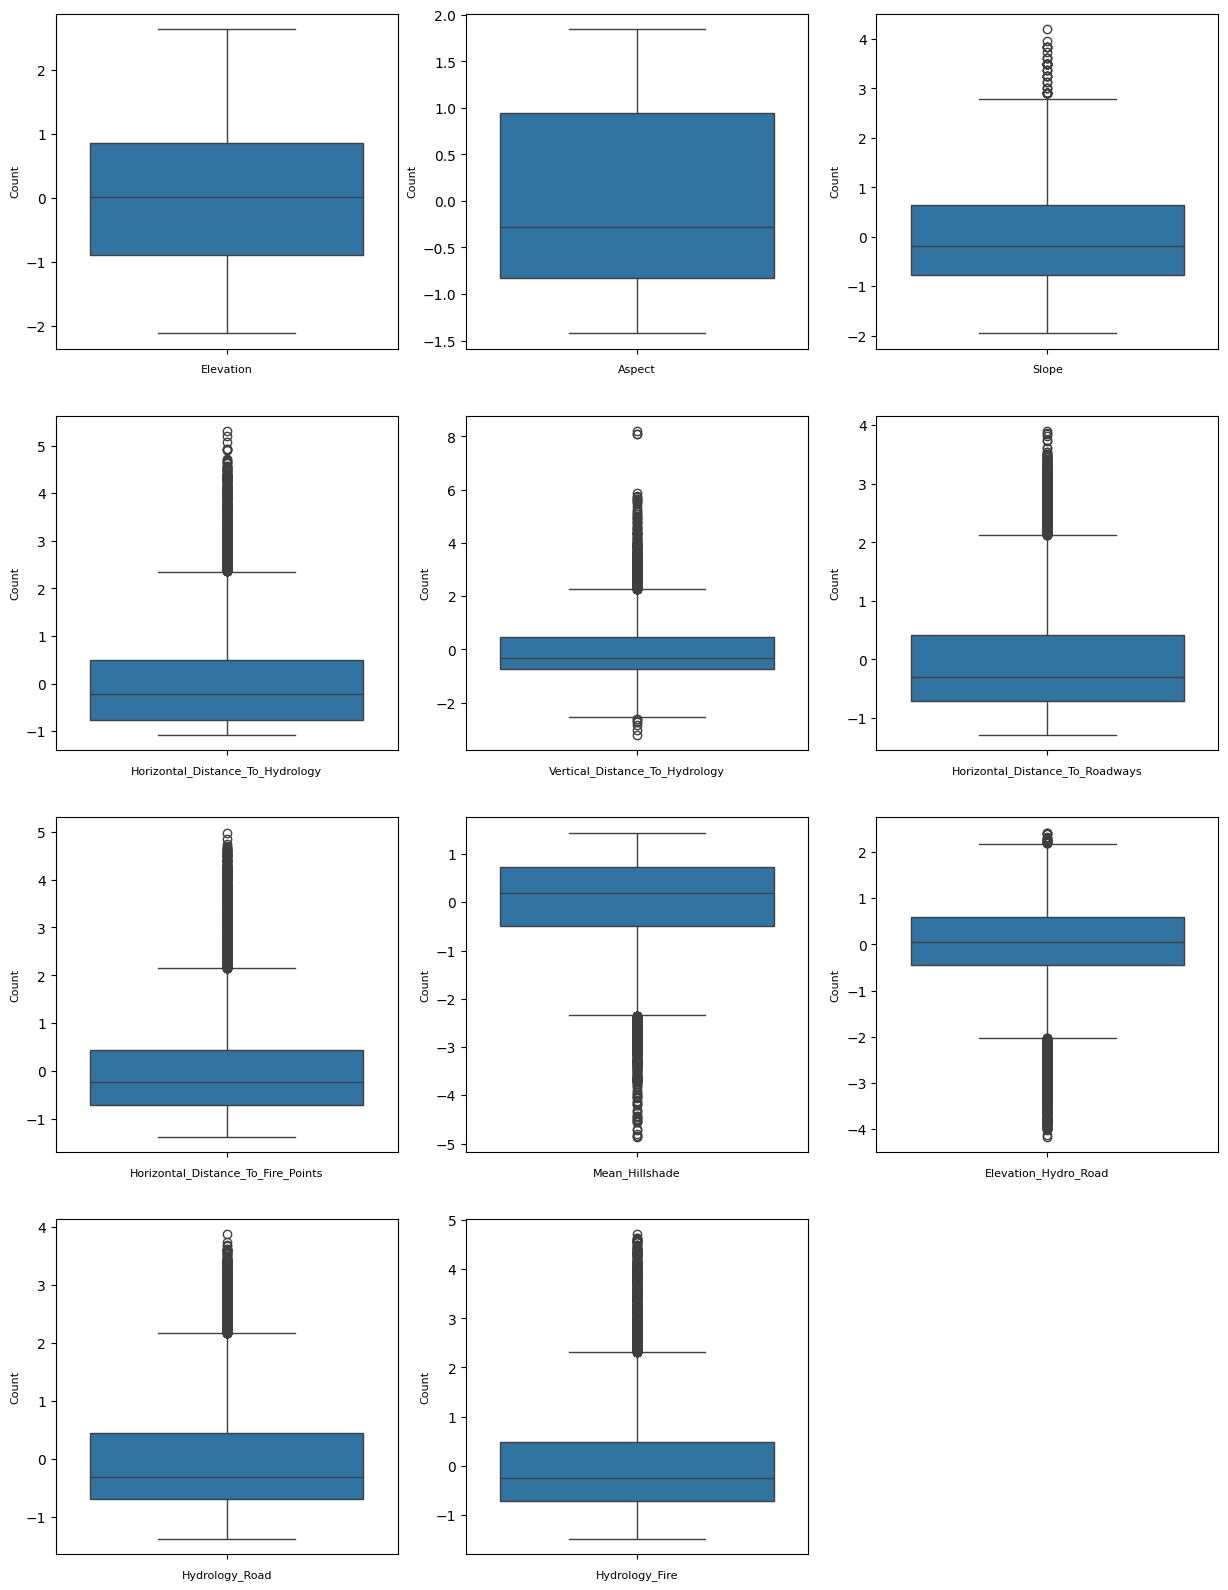

In [36]:
pltno=1
plt.figure(figsize=(15, 20))



for col in cont_cols:
  if pltno<=len(cont_cols):
    ax=plt.subplot(4,3,pltno)
    sns.boxplot(df[col])
    plt.xlabel(col,fontsize=8)
    plt.ylabel('Count',fontsize=8)
    pltno+=1
plt.show()

In [37]:
from scipy import stats
import numpy as np

z = np.abs(stats.zscore(df[cont_cols]))
print(z.max())  # to see extreme deviation
outlier_mask = (z > 3)


8.212687589838994


In [38]:
for col in cont_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"{col}: {len(outliers)} outliers")


Elevation: 0 outliers
Aspect: 0 outliers
Slope: 57 outliers
Horizontal_Distance_To_Hydrology: 512 outliers
Vertical_Distance_To_Hydrology: 586 outliers
Horizontal_Distance_To_Roadways: 830 outliers
Horizontal_Distance_To_Fire_Points: 645 outliers
Mean_Hillshade: 490 outliers
Elevation_Hydro_Road: 757 outliers
Hydrology_Road: 750 outliers
Hydrology_Fire: 516 outliers


In [39]:
for col in cont_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower, lower,
             np.where(df[col] > upper, upper, df[col]))


In [40]:
import numpy as np
df['Horizontal_Distance_To_Hydrology'] = np.log1p(df['Horizontal_Distance_To_Hydrology'])


/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)




---
# Model Preparation


###a) Split Data

In [41]:
from sklearn.model_selection import train_test_split

X=df.drop(columns=['Cover_Type'])
y=df['Cover_Type']

X_train,X_test,y_train,y_test=train_test_split(
    X,y,test_size=0.2,random_state=42 , stratify=y
    )

## b) Choose Baseline Model

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8786375661375662
              precision    recall  f1-score   support

           1       0.80      0.81      0.81       432
           2       0.81      0.67      0.73       432
           3       0.86      0.86      0.86       432
           4       0.95      0.97      0.96       432
           5       0.90      0.95      0.92       432
           6       0.86      0.91      0.88       432
           7       0.95      0.98      0.97       432

    accuracy                           0.88      3024
   macro avg       0.88      0.88      0.88      3024
weighted avg       0.88      0.88      0.88      3024



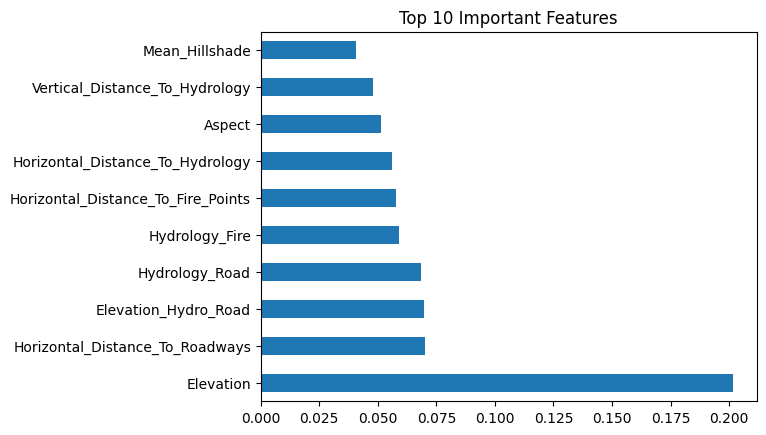

In [43]:
import pandas as pd

importance = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
importance.head(10).plot(kind='barh')
plt.title("Top 10 Important Features")
plt.show()


In [44]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200, random_state=42)
scores = cross_val_score(rf, X, y, cv=5, scoring='accuracy')

print("Accuracy after outlier handling:", scores.mean())


Accuracy after outlier handling: 0.8026455026455027


# Task
Address the issues identified in the notebook related to data preprocessing, specifically focusing on the order of scaling and outlier handling, and the handling of NaN values resulting from log transformation. Re-evaluate the model performance after applying the corrections.

## Revert scaling

### Subtask:
Revert the scaling applied to the continuous columns to their original state before outlier handling.


**Reasoning**:
Reverting the scaling on the continuous columns to apply outlier handling before scaling.



In [45]:
df[cont_cols] = scaler.inverse_transform(df[cont_cols])

## Handle outliers

### Subtask:
Apply the IQR capping method to the continuous columns to handle outliers.


**Reasoning**:
Applying IQR capping to handle outliers in the continuous columns.



In [46]:
for col in cont_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower, lower,
             np.where(df[col] > upper, upper, df[col]))

## Handle nan values from log transformation

### Subtask:
Address the NaN values created by the log transformation of 'Horizontal_Distance_To_Hydrology'.


**Reasoning**:
Check for NaN values in the 'Horizontal_Distance_To_Hydrology' column after the log1p transformation.



In [47]:
print("Number of NaN values in 'Horizontal_Distance_To_Hydrology':", df['Horizontal_Distance_To_Hydrology'].isnull().sum())

Number of NaN values in 'Horizontal_Distance_To_Hydrology': 1590


**Reasoning**:
Replace the identified NaN values in 'Horizontal_Distance_To_Hydrology' with 0, as the original values of 0 became NaN after the log1p transformation.



In [48]:
df['Horizontal_Distance_To_Hydrology'].fillna(0, inplace=True)
print("Number of NaN values in 'Horizontal_Distance_To_Hydrology' after filling:", df['Horizontal_Distance_To_Hydrology'].isnull().sum())

Number of NaN values in 'Horizontal_Distance_To_Hydrology' after filling: 0


/tmp/ipython-input-1227174812.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Horizontal_Distance_To_Hydrology'].fillna(0, inplace=True)


## Reapply scaling

### Subtask:
Scale the continuous columns again after outlier handling and addressing NaNs.


**Reasoning**:
Scale the continuous columns again after outlier handling and addressing NaNs.



In [49]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[cont_cols] = scaler.fit_transform(df[cont_cols])

## Re-evaluate the model

### Subtask:
Re-run the model training and evaluation to see the impact of these changes.


**Reasoning**:
Split the data, train the model, make predictions, and evaluate the performance using accuracy and classification report.



In [50]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

X = df.drop(columns=['Cover_Type'])
y = df['Cover_Type']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8783068783068783
              precision    recall  f1-score   support

           1       0.81      0.82      0.81       432
           2       0.81      0.67      0.73       432
           3       0.85      0.86      0.86       432
           4       0.95      0.97      0.96       432
           5       0.91      0.95      0.93       432
           6       0.85      0.91      0.87       432
           7       0.96      0.98      0.97       432

    accuracy                           0.88      3024
   macro avg       0.88      0.88      0.88      3024
weighted avg       0.88      0.88      0.88      3024



## Summary:

### Data Analysis Key Findings

*   The continuous columns were successfully reverted to their original scale before outlier handling.
*   The IQR capping method was applied to handle outliers in the continuous columns.
*   The 1590 NaN values in the 'Horizontal\_Distance\_To\_Hydrology' column, resulting from log transformation, were filled with 0.
*   The continuous columns were successfully scaled again using `StandardScaler` after outlier handling and addressing NaNs.
*   After the preprocessing changes, the Random Forest model achieved an accuracy of approximately 0.878 on the test set.
*   The classification report indicates varying performance across cover types, with classes 4 and 7 performing best and class 2 showing the lowest recall and f1-score.

### Insights or Next Steps

*   While the accuracy of 0.878 is a good starting point, further analysis of the classification report is needed to understand the model's performance on each class and identify areas for improvement, particularly for class 2.
*   Explore alternative outlier handling techniques or investigate the distribution of 'Horizontal\_Distance\_To\_Hydrology' to understand why log transformation resulted in NaNs and if a different approach to this feature is needed.




---
#Model Optimization


##a) Hyperparameter tunning

In [51]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define parameter grid
param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

rf = RandomForestClassifier(random_state=42)


## b) Running RandomizedSearchCV

In [52]:
rs = RandomizedSearchCV(
    rf,
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1,
    verbose=2
)

rs.fit(X_train, y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, None],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 500]},
                   random_state=42, scoring='accuracy', verbose=2)

## c) checking best param's

In [53]:
print("Best Parameters:", rs.best_params_)
print("Best CV Score:", rs.best_score_)


Best Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 30}
Best CV Score: 0.8710319474955499


## d) Retraining with best param's

In [54]:
best_rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=30,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='log2',
    random_state=42
)

best_rf.fit(X_train, y_train)
y_pred = best_rf.predict(X_test)


## e) Evaluate Again

In [55]:
from sklearn.metrics import classification_report, accuracy_score

print("Tuned Model Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Tuned Model Accuracy: 0.8783068783068783
              precision    recall  f1-score   support

           1       0.81      0.81      0.81       432
           2       0.82      0.67      0.74       432
           3       0.86      0.86      0.86       432
           4       0.94      0.97      0.96       432
           5       0.90      0.96      0.93       432
           6       0.85      0.90      0.87       432
           7       0.95      0.98      0.96       432

    accuracy                           0.88      3024
   macro avg       0.88      0.88      0.88      3024
weighted avg       0.88      0.88      0.88      3024



# Try XGBoost

In [56]:
import numpy as np

# Convert classes from 1–7 to 0–6
y_train_xgb = y_train - 1
y_test_xgb = y_test - 1


In [57]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score

xgb = XGBClassifier(
    n_estimators=400,
    learning_rate=0.05,
    max_depth=10,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb.fit(X_train, y_train_xgb)
y_pred_xgb = xgb.predict(X_test)

# Since model predicts 0–6, add +1 back to match original labels
y_pred_xgb = y_pred_xgb + 1

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))


XGBoost Accuracy: 0.8753306878306878
              precision    recall  f1-score   support

           1       0.79      0.78      0.79       432
           2       0.79      0.66      0.72       432
           3       0.87      0.86      0.86       432
           4       0.96      0.97      0.97       432
           5       0.90      0.96      0.93       432
           6       0.87      0.91      0.89       432
           7       0.95      0.98      0.96       432

    accuracy                           0.88      3024
   macro avg       0.87      0.88      0.87      3024
weighted avg       0.87      0.88      0.87      3024



# Confusion matrix

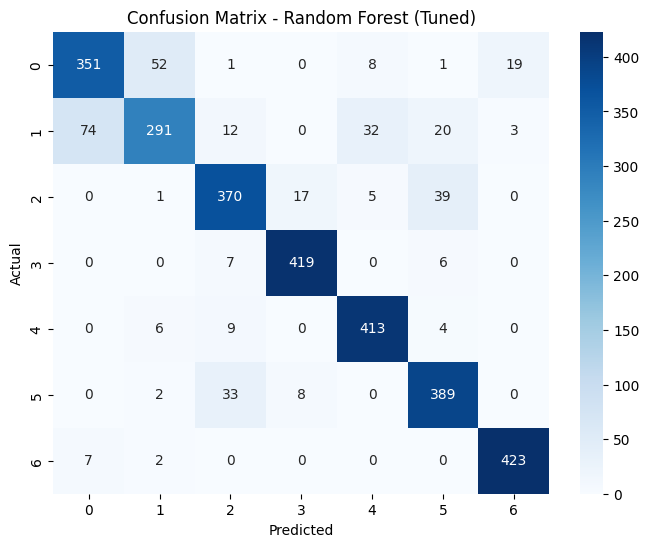

In [58]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest (Tuned)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# Save best model

In [59]:
import joblib

joblib.dump(best_rf, 'best_random_forest_model.pkl')


['best_random_forest_model.pkl']

# Feature importance

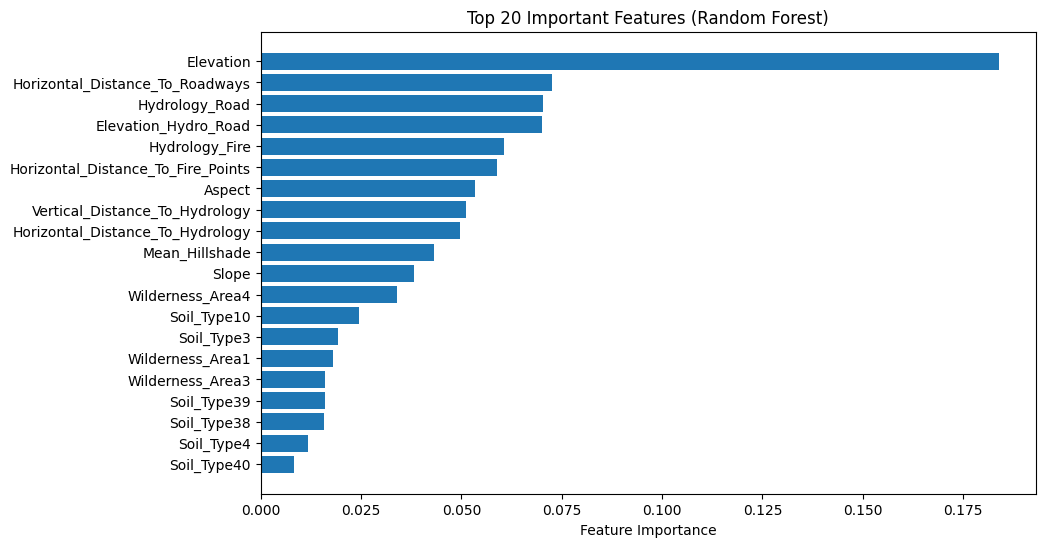

In [60]:
import pandas as pd
import matplotlib.pyplot as plt

importances = best_rf.feature_importances_
feature_names = X_train.columns

feat_imp = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp = feat_imp.sort_values('Importance', ascending=False)

plt.figure(figsize=(10,6))
plt.barh(feat_imp['Feature'][:20], feat_imp['Importance'][:20])
plt.gca().invert_yaxis()
plt.title('Top 20 Important Features (Random Forest)')
plt.xlabel('Feature Importance')
plt.show()


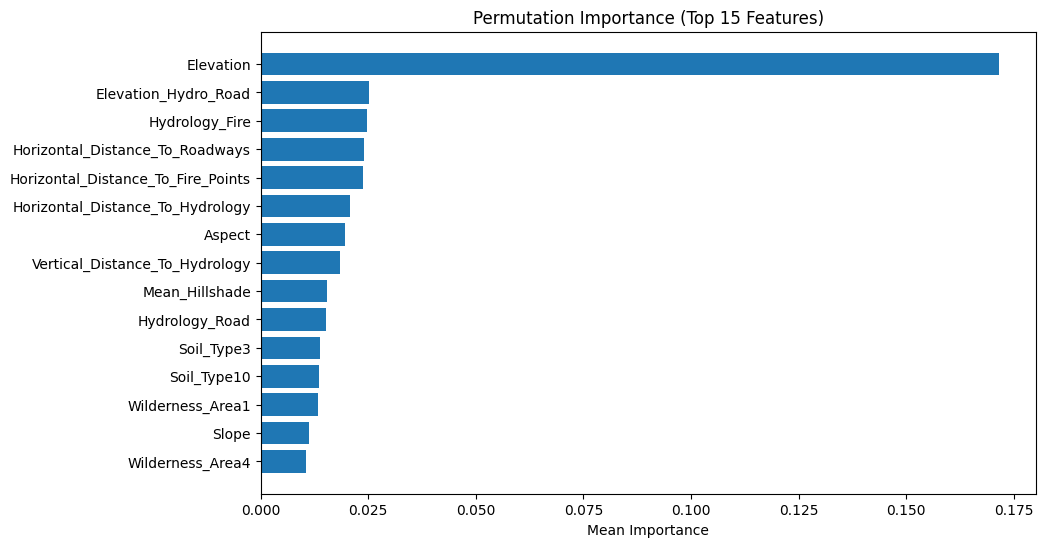

In [61]:
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(best_rf, X_test, y_test, scoring='accuracy')
perm_sorted_idx = perm_importance.importances_mean.argsort()

plt.figure(figsize=(10,6))
plt.barh(X_test.columns[perm_sorted_idx][-15:], perm_importance.importances_mean[perm_sorted_idx][-15:])
plt.title("Permutation Importance (Top 15 Features)")
plt.xlabel("Mean Importance")
plt.show()
